# Toggle Switch network

In [1]:
import matplotlib.pylab as plt   # That gives plotting, and the next line makes plots appear inline in notebook
%matplotlib inline  
import numpy as np  # That gives numerical arrays and tools for manipulating them

import scipy.optimize as opt
import scipy.linalg as la
import scipy.integrate as int


### Add input I2 to unit 2

In [2]:
 def toggle_odefun(t,x,a,b,I2):
    x1=x[0] 
    x2=x[1]
    
    dx1dt=-x1 + a/(1+x2**b)
    dx2dt=-x2 + a/(1+x1**b) + I2

    
    return np.array([dx1dt,dx2dt])


### Plotting the vector (arrow) field

### Define parameters -- including the crucial input term I2

In [3]:
a=5
b=5
I2=2

Next, define t (dummy value here), and then range of x1 and x2 values over which we'll make the plot.  

In [4]:
t=0   #MUST define a value of time for calling ode function above, even if it is not used in defining the ODE 

x1min=0
x1max=a*1.5
numptsx1=20
x1list=np.linspace(x1min,x1max,numptsx1)

x2min=0
x2max=a*1.5
numptsx2=20
x2list=np.linspace(x2min,x2max,numptsx2)


Next, we are going to define a grid of x1 and x2 values, based on the lists
above. The (i,j) point on that grid will correspond to elements (i,j) in four matrices that we are about to make.
* x1 values increase across ROWS (horizontal direction, index j)
* x2 values increase down COLUMNS (vertical direction, index i)

In [5]:
x1array,x2array = np.meshgrid(x1list,x2list)
dx1dt_array=np.zeros(x1array.shape)
dx2dt_array=np.zeros(x1array.shape)

Compute vector field at these points

In [6]:

for i in np.arange(numptsx1):
    for j in np.arange(numptsx2):
        
        #here, F is an array of velocities in x1 and x2 directions    
        F=toggle_odefun(t,[x1array[i,j],x2array[i,j]],a,b,I2)

        #We fill in these two matrices with the corresponding velocities
        dx1dt_array[i,j]=F[0]
        dx2dt_array[i,j]=F[1]

    

### Add nullclines

In [7]:
x1list_fine=np.linspace(x1min,x1max,100)
x2list_fine=np.linspace(x2min,x2max,100)


x2_nullcline_list=a/(1+x1list_fine**b)+I2 ;
x1_nullcline_list=a/(1+x2list_fine**b) ;

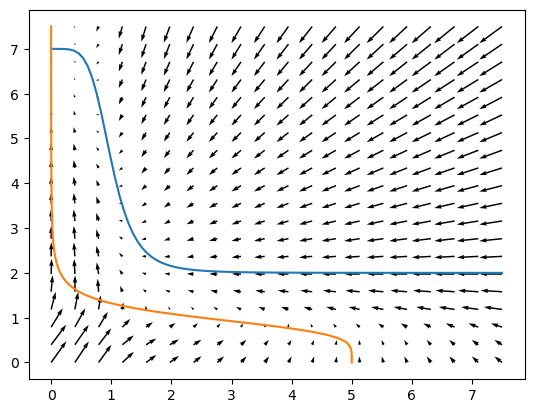

In [8]:
plt.figure(1)
plt.plot(x1list_fine,x2_nullcline_list)
plt.plot(x1_nullcline_list,x2list_fine)
        
plt.quiver(x1array,x2array,dx1dt_array,dx2dt_array) 

### Solving the ODE via scipy integrate module, which we imported above
### The crucial input term I2 is present at the value set above!

##### We pass a time range, initial condition, and evaluation  time list into solve_ivp as follows

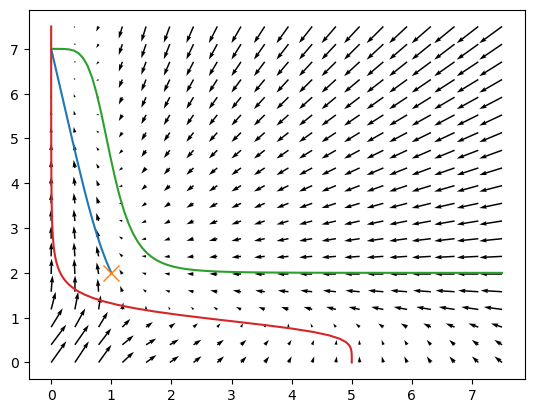

In [9]:
#specify our initial condition
x0=np.array([1,2])

#specify trange, a time range for simulation: two element array
tstart=0
tend=10
trange=np.array([tstart,tend])

#specify tlist,  a list of time points at which want to return the solution
numt=100
tlist=np.linspace(tstart,tend,numt)

sol=int.solve_ivp(toggle_odefun, trange, x0, t_eval=tlist,args=(a,b,I2))

#Plot the trajectory 
plt.plot(sol.y[0,:],sol.y[1,:])

#Add an x at initial condition
plt.plot(sol.y[0,0],sol.y[1,0],'x',markersize=12)


#and add quiver, nullclines
x2_nullcline_list=a/(1+x1list_fine**b)+I2 ;
x1_nullcline_list=a/(1+x2list_fine**b) ;


plt.plot(x1list_fine,x2_nullcline_list)
plt.plot(x1_nullcline_list,x2list_fine)
plt.quiver(x1array,x2array,dx1dt_array,dx2dt_array) 


### Now do a simulation starting from the final values above, with the input term I2 set to zero
### See persistence of our biological memory

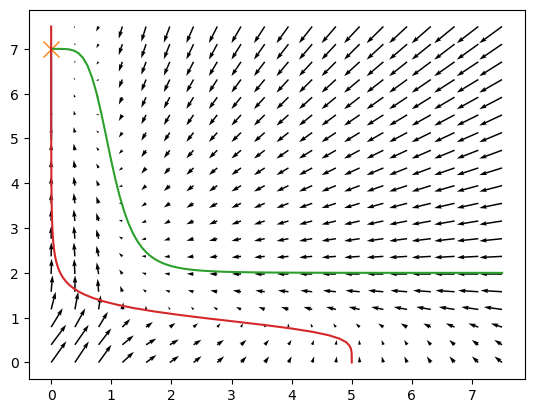

In [10]:
#specify our initial condition
x0=np.array([sol.y[0,-1],sol.y[1,-1]])

#set I2 back to zero to demonstrate memory
I2=0

#specify trange, a time range for simulation: two element array
tstart=0
tend=10
trange=np.array([tstart,tend])

#specify tlist,  a list of time points at which want to return the solution
numt=100
tlist=np.linspace(tstart,tend,numt)

sol=int.solve_ivp(toggle_odefun, trange, x0, t_eval=tlist,args=(a,b,I2))

#Plot the trajectory 
plt.plot(sol.y[0,:],sol.y[1,:])

#Add an x at initial condition
plt.plot(sol.y[0,0],sol.y[1,0],'x',markersize=12)


#and add quiver, nullclines
plt.plot(x1list_fine,x2_nullcline_list)
plt.plot(x1_nullcline_list,x2list_fine)
plt.quiver(x1array,x2array,dx1dt_array,dx2dt_array) 
